Hierarchical_Clustering

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [38]:
crime = pd.read_csv("/content/crime_data.csv")

In [39]:
crime.shape

(50, 5)

In [40]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [41]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [42]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [43]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [44]:
crime.value_counts()

Unnamed: 0      Murder  Assault  UrbanPop  Rape
Alabama         13.2    236      58        21.2    1
Pennsylvania    6.3     106      72        14.9    1
Nevada          12.2    252      81        46.0    1
New Hampshire   2.1     57       56        9.5     1
New Jersey      7.4     159      89        18.8    1
New Mexico      11.4    285      70        32.1    1
New York        11.1    254      86        26.1    1
North Carolina  13.0    337      45        16.1    1
North Dakota    0.8     45       44        7.3     1
Ohio            7.3     120      75        21.4    1
Oklahoma        6.6     151      68        20.0    1
Oregon          4.9     159      67        29.3    1
Rhode Island    3.4     174      87        8.3     1
Alaska          10.0    263      48        44.5    1
South Carolina  14.4    279      48        22.5    1
South Dakota    3.8     86       45        12.8    1
Tennessee       13.2    188      59        26.9    1
Texas           12.7    201      80        25.5    

In [45]:
crime1 = crime.copy()
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [46]:
crime1 = crime.drop(['Unnamed: 0'],axis=1)

In [47]:
crime1.shape

(50, 4)

In [48]:
# customize normal function
def norm(i):
  x = (i-i.min())/(i.max() - i.min())
  return x

In [49]:
# normalize data
crime_norm = norm(crime1)
crime_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


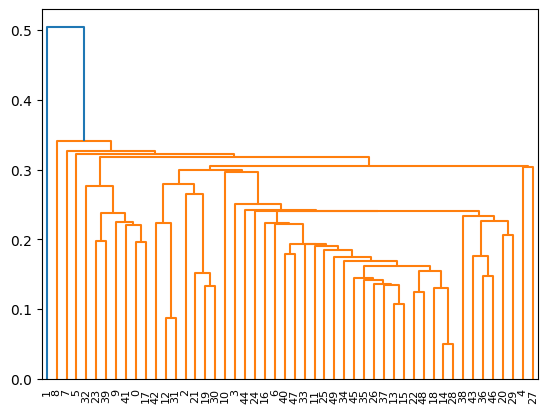

In [50]:
# create dendogram
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='single'))

In [51]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')

In [52]:
hc

AgglomerativeClustering(affinity='euclidean', linkage='single', n_clusters=4)

In [53]:
y_hc = hc.fit_predict(crime_norm)
clusters = pd.DataFrame(y_hc,columns=['clusters'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [54]:
y_hc

array([0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [55]:
clusters

,clusters
0,0
1,3
2,0
3,0
4,0
5,0
6,0
7,1
8,2
9,0


In [56]:
crime1['clusterid_hierarchial'] = clusters

In [57]:
crime1

,Murder,Assault,UrbanPop,Rape,clusterid_hierarchial
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,0


K-Mean

In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [59]:
crime2 = pd.read_csv('crime_data.csv')

In [60]:
crime2 = crime2.drop(['Unnamed: 0'],axis=1)

In [61]:
#normalization
scaler = StandardScaler()
crimek_norm = scaler.fit_transform(crime2)
crimek_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

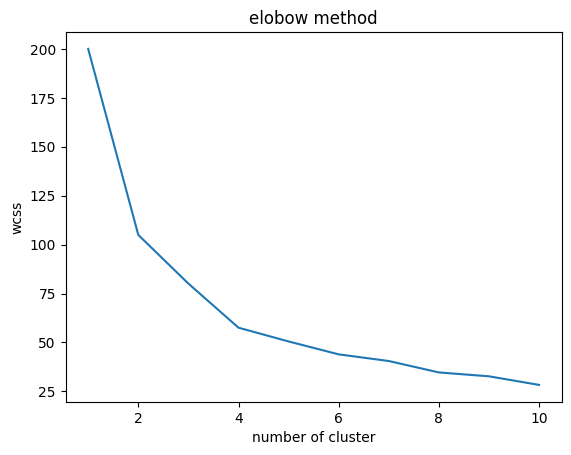

In [62]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i,init='k-means++',max_iter=300,random_state=0)
  kmeans.fit(crimek_norm)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("elobow method")
plt.xlabel("number of cluster")
plt.ylabel("wcss")
plt.show()  

In [63]:
wcss

[200.00000000000003,
 104.96163315756871,
 80.0888613219962,
 57.55425863091105,
 50.52026552535068,
 43.927464044975736,
 40.52183461131976,
 34.68738839784909,
 32.70648136388185,
 28.311639397122548]

In [64]:
kmeans = KMeans(n_clusters=4,random_state=0)
predict = kmeans.fit_predict(crimek_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [65]:
predict

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [66]:
cluster_new = KMeans(n_clusters=4,random_state=0)
new_predict = cluster_new.fit_predict(crimek_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [67]:
cluster_new.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [68]:
new_predict

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [69]:
crime1['clusterid_Kmeans'] = new_predict

In [70]:
crime1

,Murder,Assault,UrbanPop,Rape,clusterid_hierarchial,clusterid_Kmeans
0,13.2,236,58,21.2,0,3
1,10.0,263,48,44.5,3,1
2,8.1,294,80,31.0,0,1
3,8.8,190,50,19.5,0,3
4,9.0,276,91,40.6,0,1
5,7.9,204,78,38.7,0,1
6,3.3,110,77,11.1,0,0
7,5.9,238,72,15.8,1,0
8,15.4,335,80,31.9,2,1
9,17.4,211,60,25.8,0,3


DB-scan

In [71]:
crime3 = pd.read_csv('crime_data.csv')

In [72]:
crime3 = crime3.drop(['Unnamed: 0'],axis=1)

In [73]:
crime3.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

<Axes: >

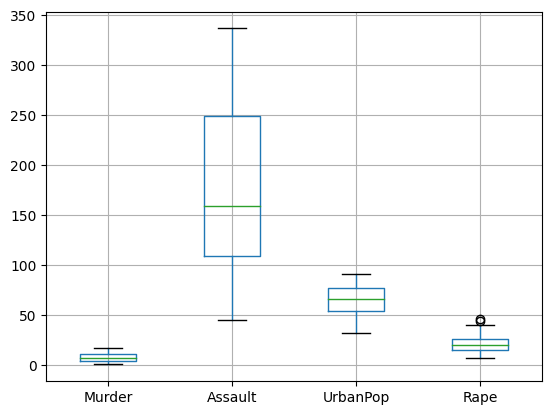

In [74]:
crime3.boxplot()

In [75]:
sc = StandardScaler()
x = sc.fit_transform(crime3)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [76]:
from sklearn.cluster import DBSCAN

In [77]:
db1 = DBSCAN()
db1.fit_predict(x)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [78]:
db = DBSCAN(eps=1,min_samples=3)
db.fit_predict(x)

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1])

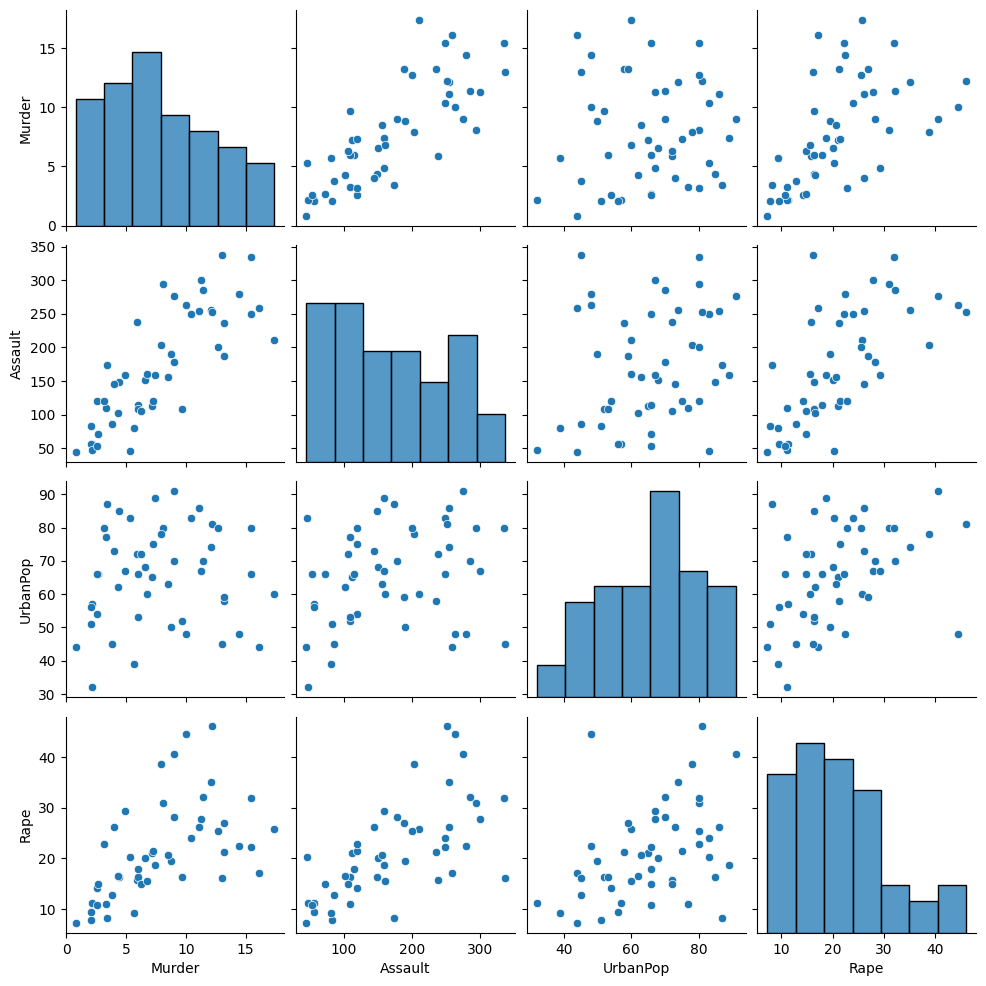

In [79]:
import seaborn as sns
sns.pairplot(crime3)

In [80]:
from sklearn.metrics import silhouette_score

In [81]:
silhouette_score(x,db.fit_predict(x))

0.19290975823254836

In [82]:
db = DBSCAN(eps=2,min_samples=3)
y = db.fit_predict(x)

In [83]:
y

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [84]:
silhouette_score(x,db.fit_predict(x))

0.23455598753159795

In [89]:
db1 = DBSCAN(eps=1,min_samples=4)
db1.fit(x)

DBSCAN(eps=1, min_samples=4)

In [90]:
db1.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [91]:
crime1['clusterid_DBscan'] = db1.labels_
crime1

,Murder,Assault,UrbanPop,Rape,clusterid_hierarchial,clusterid_Kmeans,clusterid_DBscan
0,13.2,236,58,21.2,0,3,0
1,10.0,263,48,44.5,3,1,-1
2,8.1,294,80,31.0,0,1,-1
3,8.8,190,50,19.5,0,3,-1
4,9.0,276,91,40.6,0,1,-1
5,7.9,204,78,38.7,0,1,-1
6,3.3,110,77,11.1,0,0,1
7,5.9,238,72,15.8,1,0,-1
8,15.4,335,80,31.9,2,1,-1
9,17.4,211,60,25.8,0,3,-1
